In [9]:
import numpy as np
import sklearn
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')

## 중심극한정리
#### 표본을 많이 추출할수록 표본의 분포는 정규분포에 가까워진다.

In [137]:
loans_income = pd.read_csv("data/loans_income.csv").squeeze('columns')

sample_data = loans_income.sample(1000)
sample_data.name = 'Data' 
sample_mean_05 = pd.Series([loans_income.sample(5).mean() for _ in range(1000)])
sample_mean_05.name = "Mean of 5"
sample_mean_20 = pd.Series([loans_income.sample(20).mean() for _ in range(1000)])
sample_mean_20.name = "Mean of 20"
datas = [sample_data,sample_mean_05,sample_mean_20]


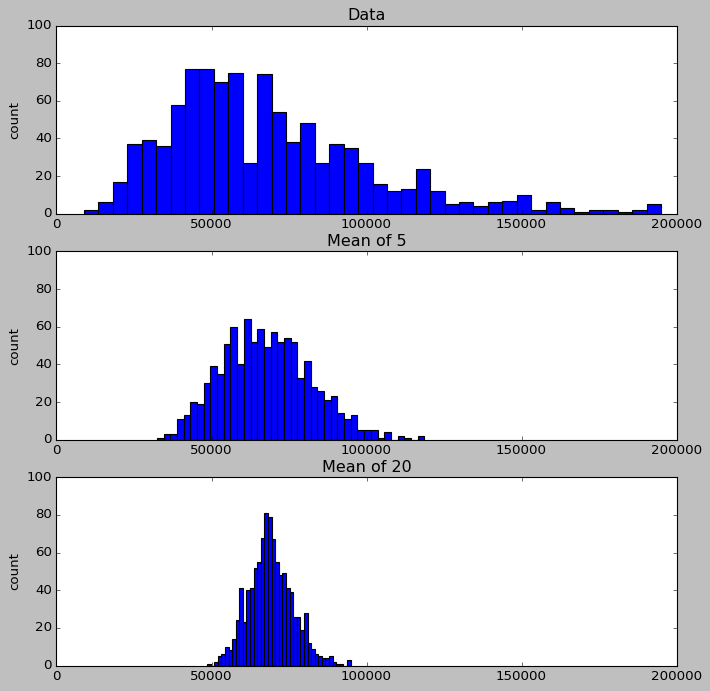

In [142]:
fig, axes = plt.subplots(3,1, figsize = (10,10))

for data, ax in zip(datas, axes.ravel()) :
    ax.hist(data, bins = 40)
    ax.set_xlim(0,200000)
    ax.set_ylim(0,100)
    ax.set_title(data.name)
    ax.set_ylabel('count')
plt.show()

## 부트스트랩
#### 표본을 복원추출하여 큰 데이터 집합을 만들고 그 데이터 집합에서 다시 표본을 추출하는 것을 말함

In [168]:
from sklearn.utils import resample

results = []

# resample는 데이터에서 같은 크기로 복원추출한다.
for _ in range(1000) :
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print("Bootstrap Statistics : ")
print(f"original : {loans_income.median()}")
print(f"bias : {results.mean() - loans_income.median()}")
print(f"std. error : {results.std()}")

Bootstrap Statistics : 
original : 62000.0
bias : -80.47899999999936
std. error : 228.95561083041997


In [169]:
results

0      62000.0
1      62000.0
2      62000.0
3      61500.0
4      62000.0
        ...   
995    62000.0
996    61800.0
997    62000.0
998    61000.0
999    61925.0
Length: 1000, dtype: float64